In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [5]:
df_half_hour=pd.read_csv('EGLL.csv')
df_half_hour.isna().sum()

valid        0
tmpf        73
dwpf        80
relh       166
drct     17701
alti     17443
vsby        88
feel       176
dtype: int64

In [6]:
filter_df=df_half_hour
filter_df

,valid,tmpf,dwpf,relh,drct,alti,vsby,feel
0,1/1/2010 0:00,34.00,29.00,81.57,20.0,NaN,17.00,27.19
1,1/1/2010 0:20,33.80,28.40,80.36,20.0,29.56,6.21,26.97
2,1/1/2010 0:50,33.80,28.40,80.36,10.0,29.56,6.21,28.53
3,1/1/2010 1:00,33.62,29.12,83.36,10.0,NaN,14.00,27.48
4,1/1/2010 1:20,33.80,28.40,80.36,360.0,29.56,6.21,26.97
...,...,...,...,...,...,...,...,...
276526,10/20/2024 21:50,57.20,51.80,82.12,220.0,29.94,6.21,57.20
276527,10/20/2024 22:20,57.20,50.00,76.82,230.0,29.94,6.21,57.20
276528,10/20/2024 22:50,57.20,50.00,76.82,220.0,29.97,6.21,57.20
276529,10/20/2024 23:20,57.20,50.00,76.82,210.0,29.97,6.21,57.20


In [7]:
# Ensure the 'valid' column is in datetime format
filter_df['valid'] = pd.to_datetime(filter_df['valid'])

# Add a 'date' column with full datetime (not just date) to support filtering
filter_df['date'] = filter_df['valid']

# Find rows with the maximum temperature for each day
daily_max_temp = filter_df.loc[filter_df.groupby(filter_df['date'].dt.date)['tmpf'].idxmax()].reset_index(drop=True)

# Define filtering range as pandas Timestamp for compatibility
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2024-10-21')

# Filter the DataFrame based on datetime
filtered_df = daily_max_temp[(daily_max_temp['date'] >= start_date) & (daily_max_temp['date'] <= end_date)]

# Drop the 'valid' column as needed
filtered_df.drop(columns=['valid'], inplace=True)

# Final result
filtered_df

,tmpf,dwpf,relh,drct,alti,vsby,feel,date
0,38.12,25.52,60.14,340.0,NaN,17.00,32.90,2010-01-01 14:00:00
1,41.00,30.20,65.16,260.0,30.03,6.21,33.84,2010-01-02 13:20:00
2,36.14,28.22,72.68,80.0,NaN,17.00,29.21,2010-01-03 12:00:00
3,33.80,26.60,74.63,290.0,30.06,5.59,28.53,2010-01-04 13:50:00
4,35.60,26.60,69.46,210.0,29.56,6.21,31.62,2010-01-05 15:50:00
...,...,...,...,...,...,...,...,...
5402,69.80,60.80,73.09,180.0,29.56,6.21,69.80,2024-10-16 12:50:00
5403,64.40,50.00,59.50,240.0,29.85,6.21,64.40,2024-10-17 13:50:00
5404,62.60,48.20,59.26,220.0,29.91,6.21,62.60,2024-10-18 13:50:00
5405,62.60,51.80,67.75,270.0,29.88,6.21,62.60,2024-10-19 13:20:00


In [8]:
filtered_df['temp_c'] = (filtered_df['tmpf'] - 32) * 5/9

# Drop the old column if needed
filtered_df.drop(columns=['tmpf'], inplace=True)

daily_max_temp=filtered_df
daily_max_temp

,dwpf,relh,drct,alti,vsby,feel,date,temp_c
0,25.52,60.14,340.0,NaN,17.00,32.90,2010-01-01 14:00:00,3.4
1,30.20,65.16,260.0,30.03,6.21,33.84,2010-01-02 13:20:00,5.0
2,28.22,72.68,80.0,NaN,17.00,29.21,2010-01-03 12:00:00,2.3
3,26.60,74.63,290.0,30.06,5.59,28.53,2010-01-04 13:50:00,1.0
4,26.60,69.46,210.0,29.56,6.21,31.62,2010-01-05 15:50:00,2.0
...,...,...,...,...,...,...,...,...
5402,60.80,73.09,180.0,29.56,6.21,69.80,2024-10-16 12:50:00,21.0
5403,50.00,59.50,240.0,29.85,6.21,64.40,2024-10-17 13:50:00,18.0
5404,48.20,59.26,220.0,29.91,6.21,62.60,2024-10-18 13:50:00,17.0
5405,51.80,67.75,270.0,29.88,6.21,62.60,2024-10-19 13:20:00,17.0


In [9]:
percentile_90 = np.percentile(daily_max_temp['temp_c'], 90)
print(f"90th Percentile of max_temp_c: {percentile_90}")
daily_max_temp.drop(columns=['date'], inplace=True)
daily_max_temp

90th Percentile of max_temp_c: 24.0


,dwpf,relh,drct,alti,vsby,feel,temp_c
0,25.52,60.14,340.0,NaN,17.00,32.90,3.4
1,30.20,65.16,260.0,30.03,6.21,33.84,5.0
2,28.22,72.68,80.0,NaN,17.00,29.21,2.3
3,26.60,74.63,290.0,30.06,5.59,28.53,1.0
4,26.60,69.46,210.0,29.56,6.21,31.62,2.0
...,...,...,...,...,...,...,...
5402,60.80,73.09,180.0,29.56,6.21,69.80,21.0
5403,50.00,59.50,240.0,29.85,6.21,64.40,18.0
5404,48.20,59.26,220.0,29.91,6.21,62.60,17.0
5405,51.80,67.75,270.0,29.88,6.21,62.60,17.0


In [10]:
daily_max_temp.isna().sum()

dwpf        1
relh        2
drct      323
alti      330
vsby        3
feel        3
temp_c      0
dtype: int64

In [11]:
daily_max_temp = daily_max_temp.ffill() 

In [12]:
daily_max_temp['drct'] = daily_max_temp['drct'].fillna(daily_max_temp['drct'].mean()) 
daily_max_temp['alti'] = daily_max_temp['alti'].fillna(daily_max_temp['alti'].mean()) 
daily_max_temp.isna().sum()

dwpf      0
relh      0
drct      0
alti      0
vsby      0
feel      0
temp_c    0
dtype: int64

In [13]:
daily_max_temp=daily_max_temp['temp_c']
daily_max_temp

0        3.4
1        5.0
2        2.3
3        1.0
4        2.0
        ... 
5402    21.0
5403    18.0
5404    17.0
5405    17.0
5406    18.0
Name: temp_c, Length: 5407, dtype: float64

In [14]:
daily_max_temp.to_csv('max_temp_c_EGLL_per_day.csv')

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam  # Import the Adam optimizer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

def normalize_data(data):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    data_df = data.to_frame()  # converts Series to DataFrame
    scaled_data = scaler.fit_transform(data_df)
    return scaled_data, scaler

def create_sequences(data, sequence_length, prediction_length=3):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length - prediction_length + 1):
        sequences.append(data[i : i + sequence_length])
        labels.append(data[i + sequence_length : i + sequence_length + prediction_length])
    return np.array(sequences), np.array(labels)


# Build and compile LSTM model
def build_lstm_model(input_shape, prediction_length=3, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(3))  # Output neurons = number of future steps
    
    # Create the Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    
    # Compile the model with the optimizer and loss function
    model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])
    return model


# Plot loss, accuracy, and predictions
def plot_metrics_and_predictions(history, y_test_rescaled, predictions_rescaled, temp_c_index):
    # Loss and Validation Loss Plot
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Predictions vs Actuals for temp_c
    plt.figure(figsize=(10, 4))
    plt.plot(predictions_rescaled[:, temp_c_index], label="Predicted temp_c")
    plt.plot(y_test_rescaled[:, temp_c_index], label="Actual temp_c")
    plt.xlabel("Time")
    plt.ylabel("Temperature (temp_c)")
    plt.legend()
    plt.show()


def iterative_forecast_map(model, x_test, days_to_predict, scaler):
    n_samples, seq_len, n_features = x_test.shape
    prediction_dict = {}

    for step in range(1, days_to_predict + 1):
        predictions = []  # Store predictions for this step
        for i in range(n_samples - step + 1):
            # Get the initial sequence for the current sample
            sequence = x_test[i].copy()
            
            # Use `seq_len - step` actual values and the remaining from predictions
            for t in range(step - 1):
                prediction = model.predict(sequence[np.newaxis, :, :])  # Add batch dimension
                prediction = prediction.reshape(1, n_features)  # Ensure correct shape
                sequence = np.vstack((sequence[1:], prediction))  # Update sequence

            # Final prediction for the current step
            final_prediction = model.predict(sequence[np.newaxis, :, :])
            predictions.append(final_prediction[0])

        # Convert predictions to array and inverse transform
        predictions = scaler.inverse_transform(np.array(predictions))

        # Store in dictionary with correct slicing
        prediction_dict[step] = predictions.reshape(-1, 1, n_features)

    return prediction_dict




In [16]:
from keras.models import load_model

# Initialize variables
sequence_length =7
prediction_length=3
# Make a copy of the original DataFrame to update
updated_data = daily_max_temp.copy()


# Normalize and create sequences
scaled_data, scaler = normalize_data(updated_data)
X, y = create_sequences(scaled_data, sequence_length)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(f"data X train shape: {X_train.shape},data X test shape: {X_test.shape}")
print(f"data y train shape: {y_train.shape},data y test shape: {y_test.shape}")

# Train-validation split
val_split = int(len(X_train) * 0.2)
X_val, y_val = X_train[-val_split:], y_train[-val_split:]
X_train, y_train = X_train[:-val_split], y_train[:-val_split]

# Train LSTM model
learning_rate = 0.001  # Specify the desired learning rate
model = build_lstm_model((X_train.shape[1], X_train.shape[2]), learning_rate=learning_rate)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=32,
    verbose=1)


data X train shape: (4318, 7, 1),data X test shape: (1080, 7, 1)
data y train shape: (4318, 3, 1),data y test shape: (1080, 3, 1)
Epoch 1/300


c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0772 - mae: 0.2155 - val_loss: 0.0319 - val_mae: 0.1346
Epoch 2/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0263 - mae: 0.1271 - val_loss: 0.0305 - val_mae: 0.1315
Epoch 3/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0253 - mae: 0.1251 - val_loss: 0.0293 - val_mae: 0.1295
Epoch 4/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0255 - mae: 0.1255 - val_loss: 0.0286 - val_mae: 0.1274
Epoch 5/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0242 - mae: 0.1224 - val_loss: 0.0277 - val_mae: 0.1255
Epoch 6/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0234 - mae: 0.1206 - val_loss: 0.0274 - val_mae: 0.1242
Epoch 7/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0230 - mae: 0.1184 - val_loss: 0.0267 - val_mae: 0.1230
Epoch 8/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0216 - mae: 0.1151 - val_loss: 0.0258 - val_mae: 0.1211
Epoch 9/300
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

In [17]:
y_pred = model.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [18]:
# Predict
y_pred = model.predict(X_test)  # Shape: (1080, 3)
y_test = y_test.reshape(-1, 3)  # Ensure it's (1080, 3)

# Inverse transform
y_pred_flat = y_pred.reshape(-1, 1)
y_test_flat = y_test.reshape(-1, 1)

y_pred_inv = scaler.inverse_transform(y_pred_flat).reshape(-1, 3)
y_test_inv = scaler.inverse_transform(y_test_flat).reshape(-1, 3)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


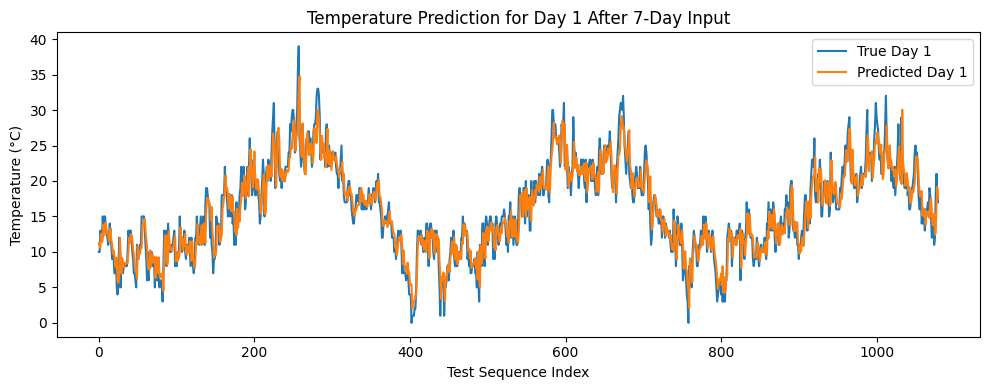

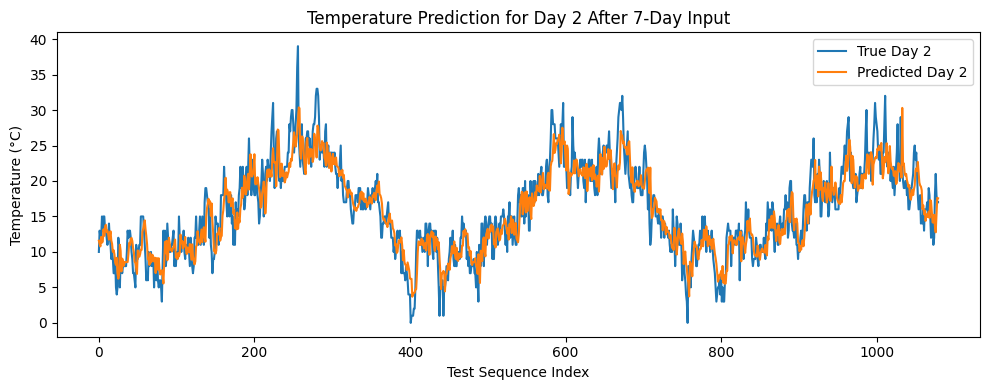

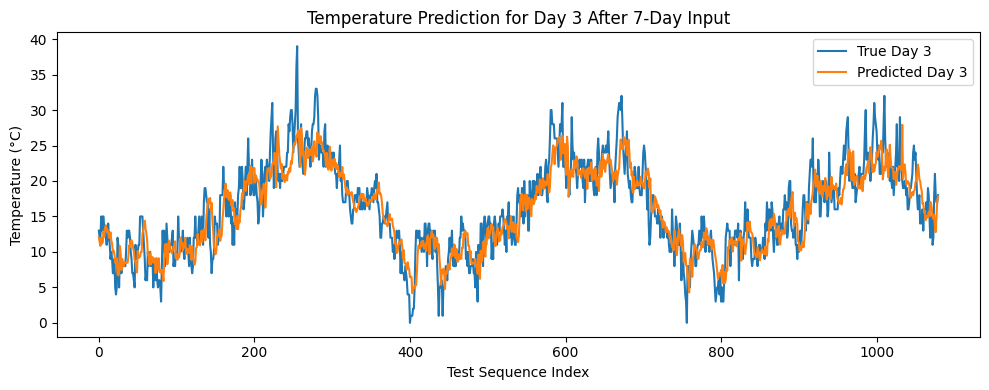

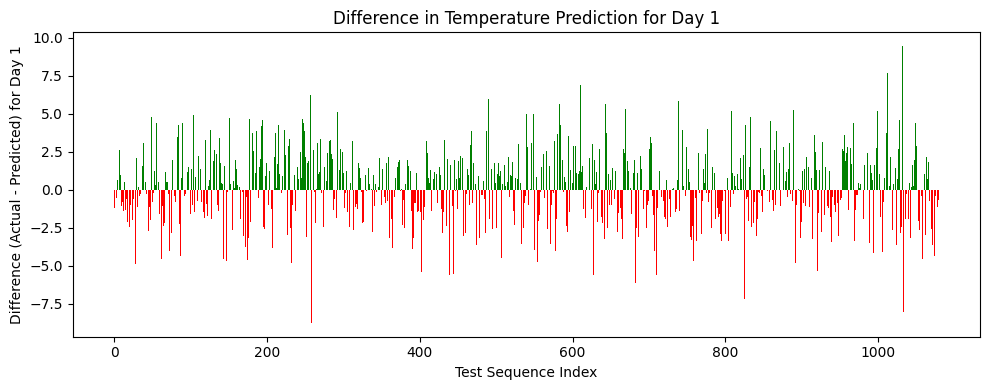

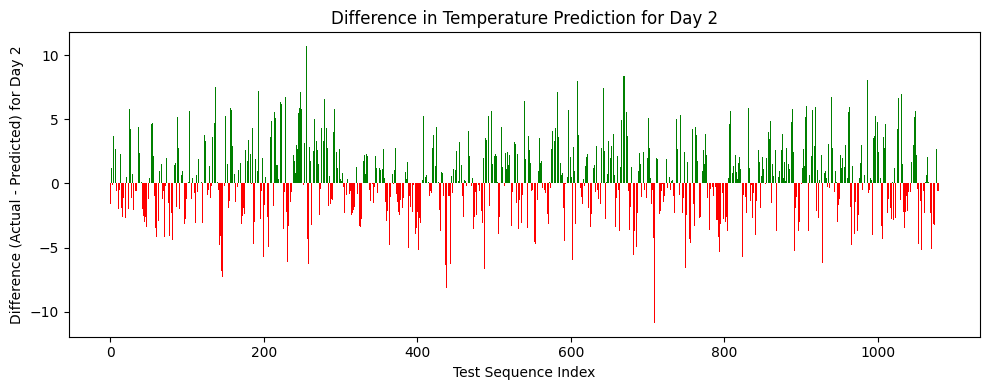

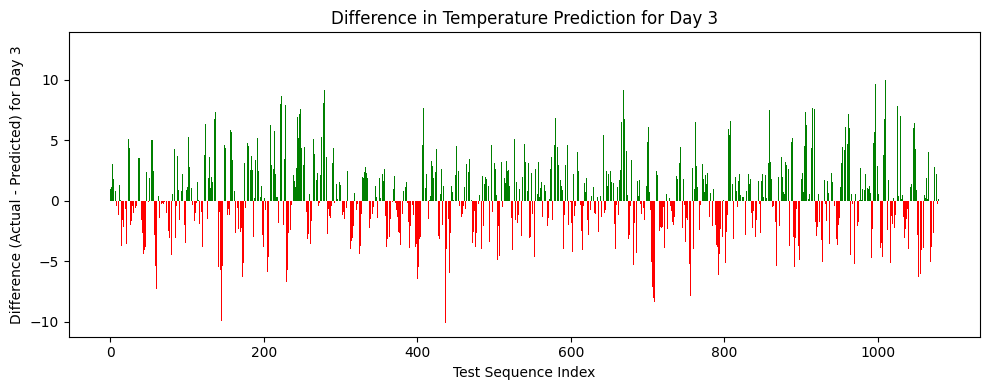


Metrics for Day 1 Prediction:
R² Score: 0.8592
Mean Squared Error (MSE): 5.7140
Mean Absolute Error (MAE): 1.8859
Root Mean Squared Error (RMSE): 2.3904

Metrics for Day 2 Prediction:
R² Score: 0.7847
Mean Squared Error (MSE): 8.7300
Mean Absolute Error (MAE): 2.3304
Root Mean Squared Error (RMSE): 2.9547

Metrics for Day 3 Prediction:
R² Score: 0.7442
Mean Squared Error (MSE): 10.3645
Mean Absolute Error (MAE): 2.5254
Root Mean Squared Error (RMSE): 3.2194


In [19]:
for day in range(prediction_length):
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_inv[:, day], label=f'True Day {day+1}')
    plt.plot(y_pred_inv[:, day], label=f'Predicted Day {day+1}')
    plt.xlabel('Test Sequence Index')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Temperature Prediction for Day {day+1} After {sequence_length}-Day Input')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Step 6: Difference bar chart ---

diff = y_test_inv - y_pred_inv
for day in range(prediction_length):
    plt.figure(figsize=(10, 4))
    colors = np.where(diff[:, day] >= 0, 'green', 'red')
    for i in range(len(diff)):
        plt.bar(i, diff[i, day], color=colors[i])
    plt.xlabel('Test Sequence Index')
    plt.ylabel(f'Difference (Actual - Predicted) for Day {day+1}')
    plt.title(f'Difference in Temperature Prediction for Day {day+1}')
    plt.tight_layout()
    plt.show()

# --- Step 7: Evaluation metrics ---
r2_scores = []
mse_scores = []
mae_scores = []
rmse_scores = []

for day in range(prediction_length):
    r2 = r2_score(y_test_inv[:, day], y_pred_inv[:, day])
    mse = mean_squared_error(y_test_inv[:, day], y_pred_inv[:, day])
    mae = mean_absolute_error(y_test_inv[:, day], y_pred_inv[:, day])
    rmse = np.sqrt(mse)

    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

    print(f"\nMetrics for Day {day+1} Prediction:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

In [20]:
# Save the trained model
model.save('model_seq7_pre3.keras')

# Save the training history
np.save('history_seq7_pre3.npy', history.history)

print("Model and training history saved successfully.")

Model and training history saved successfully.


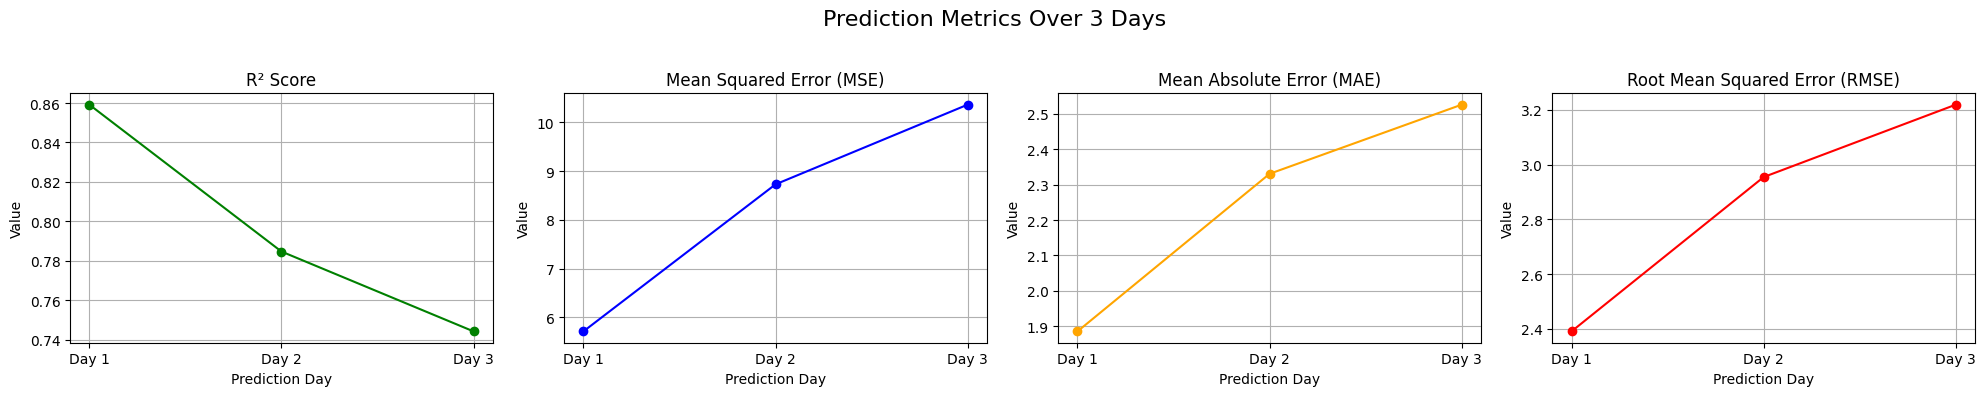

In [23]:
import matplotlib.pyplot as plt

# Metrics data
days = ['Day 1', 'Day 2', 'Day 3']


# Create 1x4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# R² Score (zoomed in between 0.8 and 1.0)
axes[0].plot(days, r2_scores, marker='o', color='green')
axes[0].set_title('R² Score')
axes[0].grid(True)

# MSE
axes[1].plot(days, mse_scores, marker='o', color='blue')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].grid(True)

# MAE
axes[2].plot(days, mae_scores, marker='o', color='orange')
axes[2].set_title('Mean Absolute Error (MAE)')
axes[2].grid(True)

# RMSE
axes[3].plot(days, rmse_scores, marker='o', color='red')
axes[3].set_title('Root Mean Squared Error (RMSE)')
axes[3].grid(True)

# Shared axis labels
for ax in axes:
    ax.set_xlabel('Prediction Day')
    ax.set_ylabel('Value')

plt.suptitle('Prediction Metrics Over 3 Days', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,661 (123.68 KB)

 Trainable params: 10,553 (41.22 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,108 (82.46 KB)